# Economia com Pierre 📊
## Google Colab
## Tutorial: Criando um gráfico utilizando o Google Colab
## Data: 17/06/2025


Primeiros 5 registros do IPCA (acumulado 12 meses):
            IPCA
Date            
2010-01-01  0.48
2010-02-01  0.39
2010-03-01  0.46
2010-04-01  0.50
2010-05-01  0.62


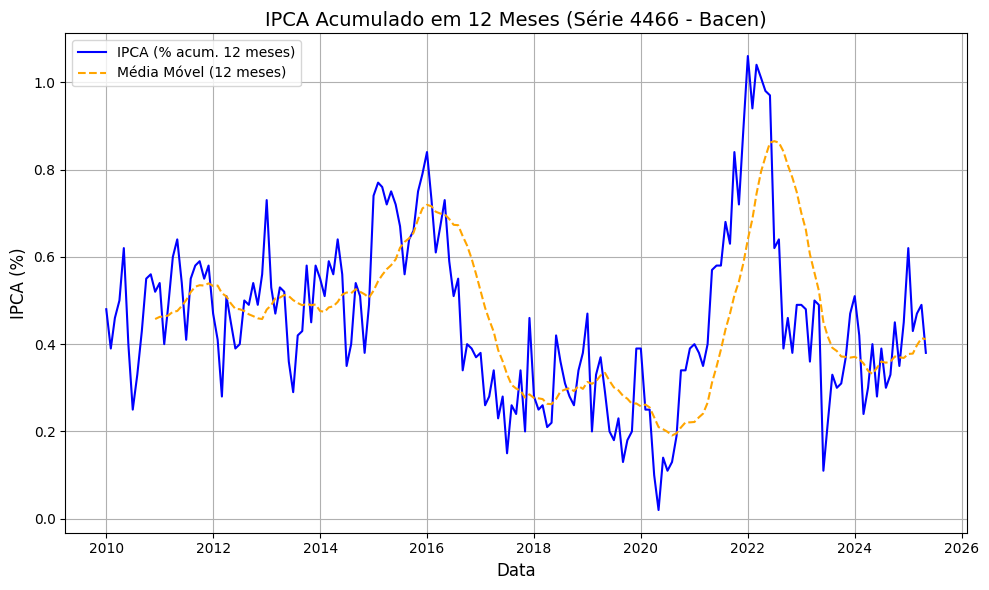


Estatísticas do IPCA (acumulado 12 meses):
count    185.000000
mean       0.458000
std        0.193609
min        0.020000
25%        0.330000
50%        0.450000
75%        0.560000
max        1.060000
Name: IPCA, dtype: float64

Maior IPCA: 1.06% em 2022-01
Menor IPCA: 0.02% em 2020-05

Dica para o post: Mostre como o Google Colab facilita análises econômicas! Explique que com poucas linhas de código, você acessa dados do Bacen, cria gráficos e faz cálculos como a média móvel. Use o gráfico salvo ('ipca_grafico.png') no seu post!


In [7]:
# Script para análise do IPCA (série 4466) no Google Colab usando a API do Bacen


# 1. Instalar a biblioteca python-bcb para acessar a API do Banco Central
!pip install python-bcb

# 2. Importar bibliotecas necessárias
from bcb import sgs  # Biblioteca para coletar séries do SGS (Bacen)
import pandas as pd  # Manipulação de dados
import matplotlib.pyplot as plt  # Criação de gráficos
from datetime import datetime  # Manipulação de datas

# 3. Coletar dados do IPCA (série 4466 - Variação acumulada em 12 meses)
# Definir período de coleta (exemplo: de 2010 até hoje)
start_date = '2010-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Data atual
ipca_data = sgs.get({'IPCA': 4466}, start=start_date, end=end_date)

# 4. Visualizar os primeiros dados
print("Primeiros 5 registros do IPCA (acumulado 12 meses):")
print(ipca_data.head())

# 5. Calcular a média móvel de 12 meses para suavizar a série
ipca_data['IPCA_Media_Movel_12'] = ipca_data['IPCA'].rolling(window=12).mean()

# 6. Criar o gráfico
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
plt.plot(ipca_data.index, ipca_data['IPCA'], label='IPCA (% acum. 12 meses)', color='blue')
plt.plot(ipca_data.index, ipca_data['IPCA_Media_Movel_12'], label='Média Móvel (12 meses)', color='orange', linestyle='--')
plt.title('IPCA Acumulado em 12 Meses (Série 4466 - Bacen)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('IPCA (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 7. Salvar o gráfico para postar no Instagram
plt.savefig('ipca_grafico.png', dpi=300)  # Salva em alta resolução
plt.show()

# 8. Análise adicional: Estatísticas básicas
print("\nEstatísticas do IPCA (acumulado 12 meses):")
print(ipca_data['IPCA'].describe())

# 9. Identificar o maior e menor IPCA no período
max_ipca = ipca_data['IPCA'].max()
max_date = ipca_data['IPCA'].idxmax()
min_ipca = ipca_data['IPCA'].min()
min_date = ipca_data['IPCA'].idxmin()

print(f"\nMaior IPCA: {max_ipca:.2f}% em {max_date.strftime('%Y-%m')}")
print(f"Menor IPCA: {min_ipca:.2f}% em {min_date.strftime('%Y-%m')}")

